In [1]:
# add parent dir to syspath
import os,sys,inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, parent_dir)

from matplotlib import pyplot as plt
from pathlib import Path
#import calculate_FIDs_for_checkpoints
from FID import calculate_FIDs_for_checkpoints#FID_interface

from dataset import load_realdata
from imageGenerators.imgGen_simple import synth_generator
from imageGenerators.imgGen_augmented import synth_generator as synth_generator_new

import numpy as np


In [2]:
# assert model is running on gpu
from tensorflow.python.client import device_lib
devlist = str(device_lib.list_local_devices())
assert "GPU:0" in devlist

calculating rlts took 12.405015 seconds
calculating rlts took 12.254456 seconds
inputimages:
(1000, 128, 512, 1)
uint8


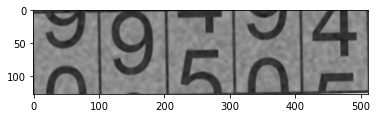

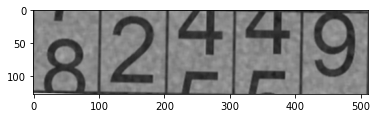

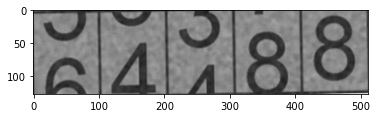

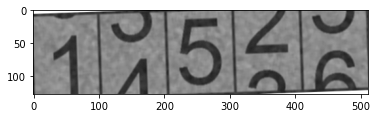

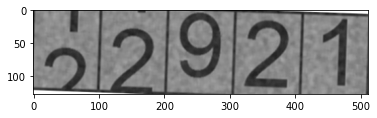

loaded checkpoint:  C:\Users\andre\Desktop\m\schriftlich\master\code\cyclegan\saved_models\test\epoch-17


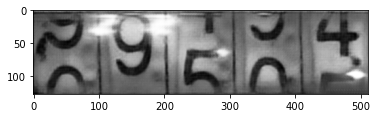

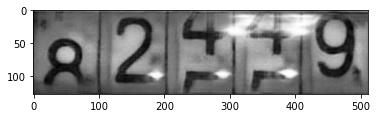

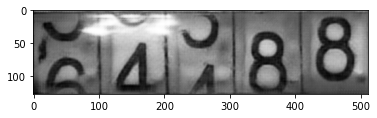

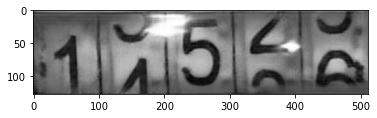

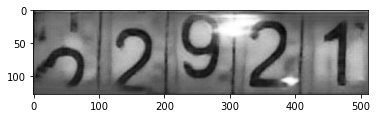

--------------------
Epoch 17:
fid(gen, wmn_easy) =	77.288637
fid(gen, wmn_difficult) =	265.393817



In [5]:
smallModel = True
model = "test"
useNewGenerator = True

firstEpoch=17
n_images = 1000

calculate_FIDs_for_checkpoints.calculate_FIDs(model, smallModel, n_images, epochstart=firstEpoch, input_synthethic=True, useNewGenerator=useNewGenerator)
    

In [4]:
--------------------

SyntaxError: invalid syntax (<ipython-input-4-a60548f61aa6>, line 1)

In [ ]:
cgan_synth2easy = Path("D:/m2/savedmodels/goals/q6_imagesize/512_128_smallModels")
epoch = 16
cgan_easy2diff = Path("D:/m2/savedmodels/goals/q12_easy2diff_furtherMethods/method4/model_easy2diff/next_after_20")
calculate_FIDs_for_checkpoints.calculate_FID_2Models(cgan_synth2easy, cgan_easy2diff, epoch, n_images=1000, epochstart=21, modelA_isSmall=True, modelB_isSmall=True)

In [ ]:
-----------------

In [ ]:
dims = (512,128)
def synthOld_realEasy(n=1000):
    synthGen = synth_generator()
    labels = np.random.randint(0,20, (n,5))
    images_synth = synthGen.generate_images(labels, margins=5, border=(5,5,5,5), width=dims[0], height=dims[1], font=0, padding_value=255, draw_vertical_seperators=False, range_normal=(-0.2,0.2), range_midstate=(0.3,0.7))
    if n > 1000:    # max number easy images
        images_easy,_ = load_realdata.load_wmr_easy(1000, resizeTo=dims, channels=1)
        n_diff = n - len(images_easy)
        duplicate_images = images_easy[np.random.randint(0,len(images_easy), (n_diff))]
        images_easy = np.append(images_easy, duplicate_images, 0)
    else:
        images_easy,_ = load_realdata.load_wmr_easy(n, resizeTo=dims, channels=1)
    fid = FID_interface.calculate_fid(images_synth, images_easy)
    return fid    

def synthNew_realEasy(n=1000):
    synthGen = synth_generator_new()
    labels = np.random.randint(0,20, (n,5))
    images_synth = synthGen.makeImages(labels, normalstate_range=(-0.2,0.2), midstate_range=(0.3,0.7), resizeTo=dims, color=True, rotate=True, channels=1, offsets=None)
    if n > 1000:    # max number easy images
        images_easy,_ = load_realdata.load_wmr_easy(1000, resizeTo=dims, channels=1)
        n_diff = n - len(images_easy)
        duplicate_images = images_easy[np.random.randint(0,len(images_easy), (n_diff))]
        images_easy = np.append(images_easy, duplicate_images, 0)
    else:
        images_easy,_ = load_realdata.load_wmr_easy(n, resizeTo=dims, channels=1)
    fid = FID_interface.calculate_fid(images_synth, images_easy)
    return fid   

In [ ]:
# calc fid a couple of times
for n in [1000,2048]:
    print("n is %d"%(n))
    for i in range(3):
        fid = synthOld_realEasy(n)
        print(fid)

In [ ]:
# synth-new, real_easy
for n in [1000,2048]:
    print("n is %d"%(n))
    for i in range(3):
        fid = synthNew_realEasy(n)
        print(fid)

In [ ]:
# gen_easy, real_easy
cgan_path = Path("D:/m2/savedmodels/goals/q6_imagesize/512_128_smallModels")
cgan_epoch = 16
for n in [1000,2048]:
    print("n is %d"%(n))
    for i in range(3):
        calculate_FIDs_for_checkpoints.calculate_FIDs(cgan_path, True, n, epochstart=cgan_epoch, input_synthethic=True, useNewGenerator=True, singleEpoch=True)

In [ ]:
# gen_easy, real_easy
cgan_path = Path("D:/m2/savedmodels/goals/q6_imagesize/512_128_smallModels")
cgan_epoch = 16
for n in [2048]:
    print("n is %d"%(n))
    for i in range(3):
        calculate_FIDs_for_checkpoints.calculate_FIDs(cgan_path, True, n, epochstart=cgan_epoch, input_synthethic=True, useNewGenerator=True, singleEpoch=True)

In [ ]:
# gen diff 1step, real diff
cgan_path = Path("D:/m2/savedmodels/goals/q11_easy2diff_direct/diffDirect_n500_l10")
cgan_epoch = 18
for n in [1000,2048]:
    print("n is %d"%(n))
    for i in range(3):
        calculate_FIDs_for_checkpoints.calculate_FIDs(cgan_path, True, n, epochstart=cgan_epoch, input_synthethic=True, useNewGenerator=True, singleEpoch=True)

In [ ]:
# gen diff 2step, real diff
cgan_synth2easy = Path("D:/m2/savedmodels/goals/q6_imagesize/512_128_smallModels")
epoch_synth2easy = 16
cgan_easy2diff = Path("D:/m2/savedmodels/goals/q9_easy2diff/small_n512_l10")
epoch_easy2diff = 11

for n in [1000,2048]:
    print("n is %d"%(n))
    for i in range(3):
        calculate_FIDs_for_checkpoints.calculate_FID_2Models(cgan_synth2easy, cgan_easy2diff, epoch_synth2easy, n_images=n, epochstart=epoch_easy2diff, modelA_isSmall=True, modelB_isSmall=True, n_digits=5, singleEpoch=True)


In [ ]:
# gen diff 2step, real diff; finetuned on generated images
cgan_synth2easy = Path("D:/m2/savedmodels/goals/q6_imagesize/512_128_smallModels")
epoch_synth2easy = 16
cgan_easy2diff = Path("D:/m2/savedmodels/goals/q12_easy2diff_furtherMethods/method4/model_easy2diff/next_after_20")
epoch_easy2diff = 40

for n in [1000,2048]:
    print("n is %d"%(n))
    for i in range(3):
        calculate_FIDs_for_checkpoints.calculate_FID_2Models(cgan_synth2easy, cgan_easy2diff, epoch_synth2easy, n_images=n, epochstart=epoch_easy2diff, modelA_isSmall=True, modelB_isSmall=True, n_digits=5, singleEpoch=True)


In [ ]:
dims = (512,128)
i, l = load_realdata.load_wmr_easy(n_toLoad = 1200, resizeTo=dims, keepRatio=False, processImage=None, channels=None)
for n in range(5):
    index = 1199-n
    print(l[index])
    plt.imshow(i[index], cmap="gray")
    plt.show()

In [ ]:
i.shape

In [ ]:
indices = np.random.randint(0,len(i), (20))
addIms = i[np.random.randint(0,len(i), (20))]
i2 = np.append(i,addIms,0)

In [ ]:
i2.shape

In [ ]:
for n in range(5):
    plt.imshow(i[1199-n], cmap="gray", vmin=0, vmax=255)
    plt.show()